# Homework 0
# Fall 2023 - CSCI 5622 - Machine Learning
# Instructor: Daniel Acuna (https://acuna.io)
# Student: Luna McBride

**Instructions:**

1. For each dimension $d$ from 1 to $D$ (e.g., $D = 10$):
    - Randomly sample a set of points (e.g., 1000 points) within a unit hypercube.
    - Compute the pairwise distances between all points.
    - Record the minimum and maximum pairwise distances.

2. Calculate the relative contrast as:
$$
\text{Relative Contrast} = \frac{\text{Maximum Distance} - \text{Minimum Distance}}{\text{Average Distance}}
$$

3. Plot the relative contrast as a function of dimensionality.

Use the package `Numpy` to do the work and `matplotlib` to plot.

Source for euclidian distance: https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/

In [67]:
import numpy as np #Numpy for array calculations
import matplotlib.pyplot as plt #matplotlib for plotting

#Add an inline for matplotlib so it will actually run in the cells
%matplotlib inline 

In [68]:
#GetRelativeContrast: Gets the relative contrast on hypercubes of dimension D
#Input: The number of dimensions D
#Output: A Dictionary (contrast) holding the contrasts in format dimension : contrast
def getRelativeContrast(D):
    contrast = {} #Create the contrast dictionary
    fig, axes = plt.subplots() #Build the subplot

    for dimension in range(1,D+1):
        hypercube = [] #Holder for the generated points of the hypercube
        distance = [] #Calculated Distanced
        lenHypercube = 1000 #Length of the hypercube list
    
        #For the number of points we want, generate a point for the hypercube
        for randPointGenerator in range(0, lenHypercube): 
            hypercube.append(np.random.rand(dimension, 1)) #Append a generated point to the hypercube
        
        #For each value in the hypercube, get the distance between them and other points
        for i in range(0, lenHypercube):
            point = hypercube[i] #Get the first point
            
            #For each following value in the hypercube, get their distance
            for j in range(i+1, lenHypercube):
                comparePoint = hypercube[j] #Get the point to compare to our point
                distance.append(np.linalg.norm(point - comparePoint)) #Append euclidian distance
                
        minDistance = np.min(distance) #Get the minimum distance
        maxDistance = np.max(distance) #Get the maximum distance
        averageDistance = np.average(distance) #Get the average distance
        relativeContrast = (maxDistance - minDistance) / averageDistance #Use the above distances to calculate relative contrast
    
        contrast.update({dimension:relativeContrast}) #Update the contrast dictionary with the dimension : the contrast
    
    return contrast #Return the contrast dictionary

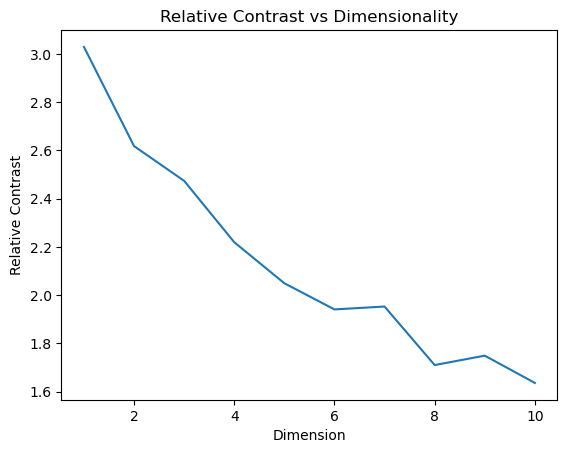

In [69]:
# Your solution here
D = 10 #Include a D value
contrast = getRelativeContrast(D) #Call the get relative contrast function with the given D

plt.xlabel("Dimension") #Include the x label of dimension on the plot
plt.ylabel("Relative Contrast") #Include the y label of relative contrast on the plot
plt.title("Relative Contrast vs Dimensionality") #Include the comparison title on the plot
plt.plot(list(contrast.keys()), list(contrast.values())) #Plot the contrast
plt.show() #Show the plot